This notebook analyzes the SAM files for centromere mapped reads for HG002.
1. Subset chromosome fasta files using Hailey's CenSat annotations to get centromere fasta files
2. Simulate centromere reads using wgsim to get fastq files
3. Align fastq files to HG002 diploid genome v0.7 using minimap2 to get SAM files
4. Analyze SAM files 

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.patches as mplpatches
from operator import itemgetter

# Exploratory Data Analysis

## Alignment Score Histograms for each read size (All Centromeres)

In [ ]:
import pandas as pd
import numpy as np
chrList = ["chr1_MATERNAL", "chr1_PATERNAL", "chr2_MATERNAL", "chr2_PATERNAL",
           "chr3_MATERNAL", "chr3_PATERNAL", "chr4_MATERNAL", "chr4_PATERNAL", 
           "chr5_MATERNAL", "chr5_PATERNAL", "chr6_MATERNAL", "chr6_PATERNAL", 
           "chr7_MATERNAL", "chr7_PATERNAL", "chr8_MATERNAL", "chr8_PATERNAL", 
           "chr9_MATERNAL", "chr9_PATERNAL", "chr10_MATERNAL", "chr10_PATERNAL", 
           "chr11_MATERNAL", "chr11_PATERNAL", "chr12_MATERNAL", "chr12_PATERNAL", 
           "chr13_MATERNAL", "chr13_PATERNAL", "chr14_MATERNAL", "chr14_PATERNAL", 
           "chr15_MATERNAL", "chr15_PATERNAL", "chr16_MATERNAL", "chr16_PATERNAL", 
           "chr17_MATERNAL", "chr17_PATERNAL", "chr18_MATERNAL", "chr18_PATERNAL", 
           "chr19_MATERNAL", "chr19_PATERNAL", "chr20_MATERNAL", "chr20_PATERNAL", 
           "chr21_MATERNAL", "chr21_PATERNAL", "chr22_MATERNAL", "chr22_PATERNAL",
           "chrX_MATERNAL", "chrY_PATERNAL"]

oneChrLst = ['chr3_PATERNAL', 
            #  'chrY_PATERNAL'
            ]
readLengths = [
            1000,
            5000,
            10000,
            15000,20000,40000,60000,80000,
            100000
            ]

for i in oneChrLst:
    print(f'running for {i}')
    uniqueList,multiMappedSame,multiMappedDiff,unmappedList,completeAlignmentList = [],[],[],[],[]
    for j in readLengths:
        input_file = f"/Users/emilyxu/Desktop/readSimulationProject/aligned-10k-reads/{i}/{i}_sams/{j}-10kreads.sam"

        # Initialize an empty list to store SAM data
        sam_data = []

        # Read the SAM file line by line, excluding headers
        with open(input_file, 'r') as f:
            for line in f:
                if not line.startswith('@'):
                    sam_data.append(line.strip().split('\t'))

        # Create a DataFrame from the SAM data
        df = pd.DataFrame(sam_data)
        df['Alignment Score'] = df[13].str.split(':').str[2].astype(int)
        ax = sns.histplot(data=df['Alignment Score'], bins=30, kde=True) # plot histogram
        ax.ticklabel_format(style='plain', axis='x',useOffset=False)  # get rid of scientific notation values
        ax.tick_params(labelrotation=45)  # rotate x ticks
        plt.title(f'{i}: {j}bp Alignment Score Distribution')
        # plot.set_xlabel('Overlap End Coordinates')
        # plot.set_ylabel('Frequency')
        plt.show()


## One histogram for all read sizes

In [ ]:
oneChrLst = ['chrX_MATERNAL', 
            #  'chrY_PATERNAL'
            ]
readLengths = [
            1000,
            5000,
            10000,
            15000,20000,40000,60000,80000,
            100000
            ]

for i in oneChrLst:
    print(f'running for {i}')
    uniqueList,multiMappedSame,multiMappedDiff,unmappedList,completeAlignmentList = [],[],[],[],[]
    for j in readLengths:
        print(f'    running for {j}')
        input_file = f"/Users/emilyxu/Desktop/readSimulationProject/aligned-10k-reads/{i}/{i}_sams/{j}-10kreads.sam"

        # Initialize an empty list to store SAM data
        sam_data = []

        # Read the SAM file line by line, excluding headers
        with open(input_file, 'r') as f:
            for line in f:
                if not line.startswith('@'):
                    sam_data.append(line.strip().split('\t'))

        # Create a DataFrame from the SAM data
        df = pd.DataFrame(sam_data)
        df['Alignment Score'] = df[13].str.split(':').str[2].astype(int)
        sns.kdeplot(data=df['Alignment Score'], shade=True, color='blue')  # Create a kernel density plot
        # plt.title(f'{i}: {j}bp Alignment Score Distribution')
        # plt.show()

## Edit Distance Histograms for All Read sizes

In [ ]:
oneChrLst = ['chr1_MATERNAL', 
            #  'chrY_PATERNAL'
            ]
readLengths = [
            1000,
            5000,
            10000,
            15000,20000,40000,60000,80000,
            100000
            ]

for i in oneChrLst:
    print(f'running for {i}')
    colors = ['red','orange','yellow','green','blue','purple','pink','magenta','brown']
    for j,col in zip(readLengths,colors):
        print(f'    running for {j}')
        input_file = f"/Users/emilyxu/Desktop/readSimulationProject/aligned-10k-reads/{i}/{i}_sams/{j}-10kreads.sam"

        # Initialize an empty list to store SAM data
        sam_data = []

        # Read the SAM file line by line, excluding headers
        with open(input_file, 'r') as f:
            for line in f:
                if not line.startswith('@'):
                    sam_data.append(line.strip().split('\t'))

        # Create a DataFrame from the SAM data
        df = pd.DataFrame(sam_data)
        df['Edit Distance'] = df[11].str.split(':').str[2].astype(int)
        ax = sns.histplot(data=df['Edit Distance'], bins=30, kde=True) # plot histogram
        # sns.kdeplot(data=df['Edit Distance'], shade=True, color=col)
        ax.ticklabel_format(style='plain', axis='x',useOffset=False)  # get rid of scientific notation values
        ax.tick_params(labelrotation=45)  # rotate x ticks
        plt.title(f'{i}: {j}bp Edit Distance Distribution')
        plt.show()


## Density plots for Distribution of Mapped coordinates for all read sizes

In [ ]:
oneChrLst = ['chrX_MATERNAL', 
            #  'chrY_PATERNAL'
            ]
readLengths = [
            1000,
            5000,
            10000,
            15000,20000,40000,60000,80000,
            100000
            ]

for i in oneChrLst:
    print(f'running for {i}')
    colors = ['red','orange','yellow','green','blue','purple','pink','magenta','brown']
    for j,col in zip(readLengths,colors):
        print(f'    running for {j}')
        input_file = f"/Users/emilyxu/Desktop/readSimulationProject/aligned-10k-reads/{i}/{i}_sams/{j}-10kreads.sam"

        # Initialize an empty list to store SAM data
        sam_data = []

        # Read the SAM file line by line, excluding headers
        with open(input_file, 'r') as f:
            for line in f:
                if not line.startswith('@'):
                    sam_data.append(line.strip().split('\t'))

        # Create a DataFrame from the SAM data
        df = pd.DataFrame(sam_data)
        df[3] = df[3].astype(int)
        sns.kdeplot(data=df[3], shade=True, color='blue')  # Create a kernel density plot
        plt.title(f'ChrX: Distribution of Mapped Coordinates for {j}bp reads')
        # plt.ylim(0,7)
        plt.xlim(57000000,62000000)
        plt.show()
        # sns.kdeplot(data=df['Edit Distance'], shade=True, color=col)
        # ax.ticklabel_format(style='plain', axis='x',useOffset=False)  # get rid of scientific notation values



## Descriptive Stats for Alignments - ChrX

In [ ]:
oneChrLst = ['chrX_MATERNAL', 
            #  'chrY_PATERNAL'
            ]
readLengths = [
            1000,
            5000,
            10000,
            15000,20000,40000,60000,80000,
            100000
            ]

for i in oneChrLst:
    print(f'running for {i}')
    colors = ['red','orange','yellow','green','blue','purple','pink','magenta','brown']
    for j,col in zip(readLengths,colors):
        print(f'    running for {j} bp')
        input_file = f"/Users/emilyxu/Desktop/readSimulationProject/aligned-10k-reads/{i}/{i}_sams/{j}-10kreads.sam"

        # Initialize an empty list to store SAM data
        sam_data = []

        # Read the SAM file line by line, excluding headers
        with open(input_file, 'r') as f:
            for line in f:
                if not line.startswith('@'):
                    sam_data.append(line.strip().split('\t'))

        # Create a DataFrame from the SAM data
        df = pd.DataFrame(sam_data)
        df[3] = df[3].astype(int)
        df['Edit Distance'] = df[11].str.split(':').str[2].astype(int)
        df['Alignment Score'] = df[13].str.split(':').str[2].astype(int)
        print(df.describe())

# Figures

## Read Coverage plots 

In [4]:
import matplotlib.pyplot as plt 
import matplotlib.patches as mplpatches
import numpy as np
import argparse
import pandas as pd
from operator import itemgetter

running for chr1_MATERNAL
    running for 100000 bp


/opt/anaconda3/envs/cse160/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


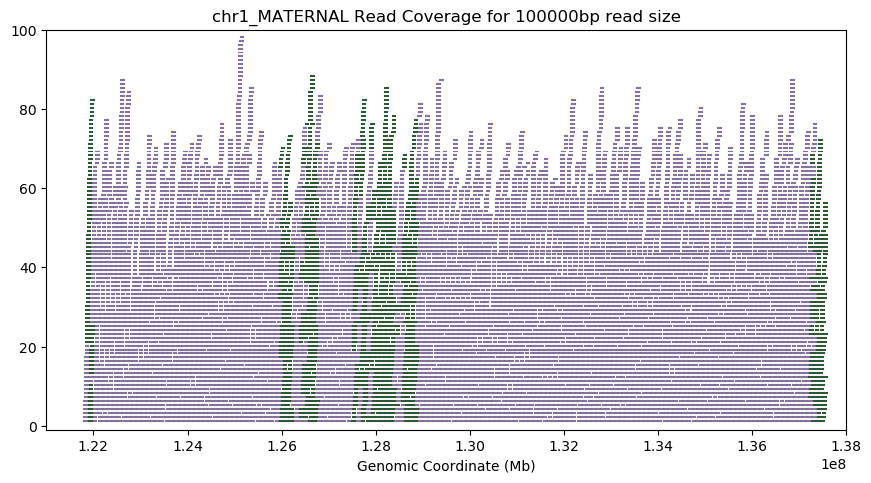

In [15]:
oneChrLst = [
            # 'chrX_MATERNAL', 
            # 'chrY_PATERNAL'
            'chr1_MATERNAL'
            ]

chrList = ["chr1_MATERNAL", "chr1_PATERNAL", "chr2_MATERNAL", "chr2_PATERNAL",
           "chr3_MATERNAL", "chr3_PATERNAL", "chr4_MATERNAL", "chr4_PATERNAL", 
           "chr5_MATERNAL", "chr5_PATERNAL", "chr6_MATERNAL", "chr6_PATERNAL", 
           "chr7_MATERNAL", "chr7_PATERNAL", "chr8_MATERNAL", "chr8_PATERNAL", 
           "chr9_MATERNAL", "chr9_PATERNAL", "chr10_MATERNAL", "chr10_PATERNAL", 
           "chr11_MATERNAL", "chr11_PATERNAL", "chr12_MATERNAL", "chr12_PATERNAL", 
           "chr13_MATERNAL", "chr13_PATERNAL", "chr14_MATERNAL", "chr14_PATERNAL", 
           "chr15_MATERNAL", "chr15_PATERNAL", "chr16_MATERNAL", "chr16_PATERNAL", 
           "chr17_MATERNAL", "chr17_PATERNAL", "chr18_MATERNAL", "chr18_PATERNAL", 
           "chr19_MATERNAL", "chr19_PATERNAL", "chr20_MATERNAL", "chr20_PATERNAL", 
           "chr21_MATERNAL", "chr21_PATERNAL", "chr22_MATERNAL", "chr22_PATERNAL",
           "chrX_MATERNAL", "chrY_PATERNAL"]

readLengths = [
            # 1000,
            # 5000,
            # 10000,
            # 15000,
            # 20000,
            # 40000,
            # 60000,
            # 80000,
            100000
            ]

for i in oneChrLst:
    print(f'running for {i}')
    for j in readLengths:
        print(f'    running for {j} bp')
        input_file = f"/Users/emilyxu/Desktop/readSimulationProject/aligned-10k-reads/{i}/{i}_sams/{j}-10kreads.sam"

        # Initialize an empty list to store SAM data
        sam_data = []

        # Read the SAM file line by line, excluding headers
        with open(input_file, 'r') as f:
            for line in f:
                if not line.startswith('@'):
                    sam_data.append(line.strip().split('\t'))

        df = pd.DataFrame(sam_data)

        # Count the occurrences of values in the first column (QNAME)
        value_counts = df[0].value_counts()

        # Extract values that appear more than once
        multi_mapped_values = value_counts[value_counts > 1].index.tolist()
        # Extract values that appear just once
        unique_mapped_values = value_counts[value_counts == 1].index.tolist()

        # Filter the DataFrame to get the multi-mapped entries
        multi_mapped_df = df[df[0].isin(multi_mapped_values)& (df[1] != '4')]
        unique_mapped_df = df[df[0].isin(unique_mapped_values)& (df[1] != '4')]

        # filtering for just the top multi aligned reads
        completeAlignment = multi_mapped_df[(multi_mapped_df[5] == f'{j}M') & ( multi_mapped_df[13] == f'AS:i:{2*j}')]

        read_counts = completeAlignment[0].value_counts()

        # Get a list of reads that appear 3 times or less
        reads_to_keep = read_counts[read_counts <= 2].index

        # Use the isin function to filter the DataFrame for top alignments
        filtered_df = completeAlignment[completeAlignment[0].isin(reads_to_keep)]

        unique_mapped_df[3] = unique_mapped_df[3].astype(int)
        filtered_df[3] = filtered_df[3].astype(int)

        uniqueList = unique_mapped_df[3].values.tolist()
        filteredList = filtered_df[3].values.tolist()
        
        Purple= '#8B79A5'
        Green ='#95BCA5'
        darkGreen ='#325b38'
        Blue ='#89B0D0'
        Pink='#FFB6C1'

        finalList = []

        for read in uniqueList:
            read_start = read
            read_end = read_start + j
            block_start = read_start
            block_width = j
            finalList.append([read_start, read_end, block_start, block_width, Purple,False])

        for read in filteredList:
            read_start = read
            read_end = read_start + j
            block_start = read_start
            block_width = j
            finalList.append([read_start, read_end, block_start, block_width,darkGreen,False])
        
        figureWidth=8
        figureHeight=5
        plt.figure(figsize=(figureWidth,figureHeight))

        panelHeight=4
        panelWidth=8

        panel2 = plt.axes([0.1/figureWidth,1.7/figureHeight,panelWidth/figureWidth,panelHeight/figureHeight])
        # panel2.set_facecolor('#FFFF33')

        iBlue=(88/255,85/255,120/255)

        finalList.sort(key=itemgetter(0))
        countDict = {}
        count=0
        for ypos in range(1,len(finalList)):
            lastVal = 121000000
            for read in finalList:
                gstart,gend,blockstarts,blockwidths,readType,plotted=read[0],read[1],read[2],read[3],read[4],read[5]
                if plotted != True: # if not plotted yet, check if start coord is greater than curr end
                    if gstart > lastVal: # if greater -> plot
                        # print(f'plotting rectangles {count}')
                        rectangle = mplpatches.Rectangle((blockstarts, ypos),
                                                        blockwidths,0.5,
                                                        facecolor=readType,
                                                        edgecolor='black',
                                                        linewidth=0.05)
                        panel2.add_patch(rectangle)
                        lastVal = gend
                        read[5] = True
                        count+=1

        panel2.set_xlim(121000000,138000000)
        panel2.set_ylim(-1,200)
        panel2.set_xlabel('Genomic Coordinate (Mb)')
        # panel2.set_xticks(['57','58','59','60','61','62'])
        plt.title(f'{i} Read Coverage for {j}bp read size')
        plt.savefig(f'/Users/emilyxu/Desktop/readSimulationProject/coverageFigs/{i}-reads-{j}.png', dpi=2400)


## Categorizing MultiMapped Reads 
- one top alignment to correct hap
- two top alignments, both to same, correct haps
- 3+ top alignments or two top to both haps

running for chrX_MATERNAL
    running for 1000 bp
    running for 5000 bp
    running for 10000 bp
    running for 15000 bp
    running for 20000 bp
    running for 40000 bp
    running for 60000 bp
    running for 80000 bp
    running for 100000 bp


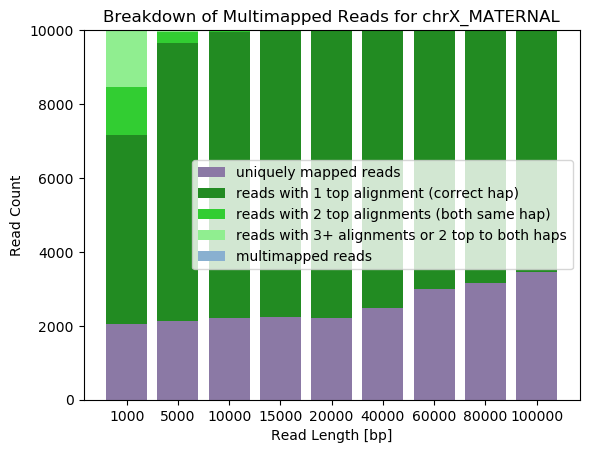

running for chrY_PATERNAL
    running for 1000 bp
    running for 5000 bp
    running for 10000 bp
    running for 15000 bp
    running for 20000 bp
    running for 40000 bp
    running for 60000 bp
    running for 80000 bp
    running for 100000 bp


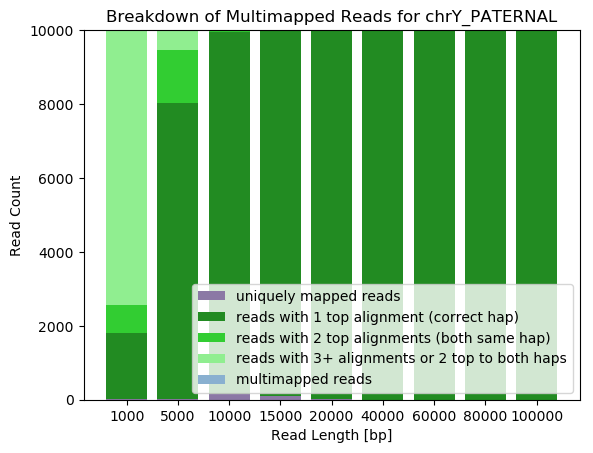

running for chr1_MATERNAL
    running for 1000 bp
    running for 5000 bp
    running for 10000 bp
    running for 15000 bp
    running for 20000 bp
    running for 40000 bp
    running for 60000 bp
    running for 80000 bp
    running for 100000 bp


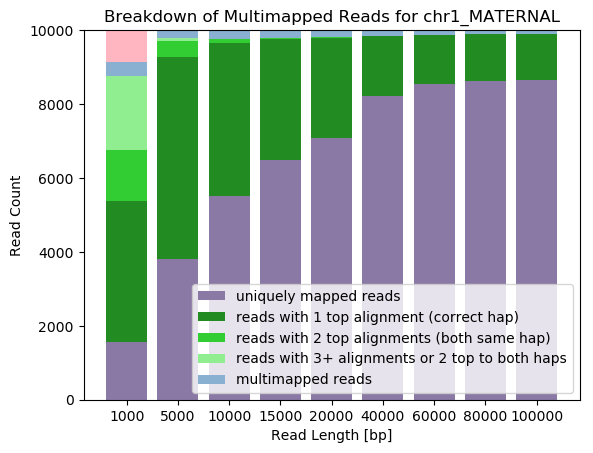

running for chr2_MATERNAL
    running for 1000 bp
    running for 5000 bp
    running for 10000 bp
    running for 15000 bp
    running for 20000 bp
    running for 40000 bp
    running for 60000 bp
    running for 80000 bp
    running for 100000 bp


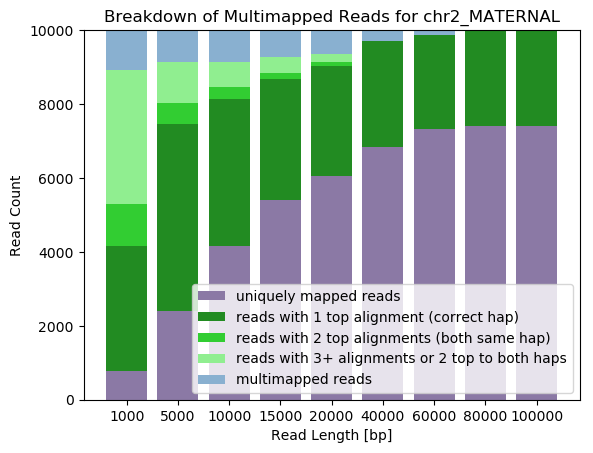

running for chr13_MATERNAL
    running for 1000 bp
    running for 5000 bp
    running for 10000 bp
    running for 15000 bp
    running for 20000 bp
    running for 40000 bp
    running for 60000 bp
    running for 80000 bp
    running for 100000 bp


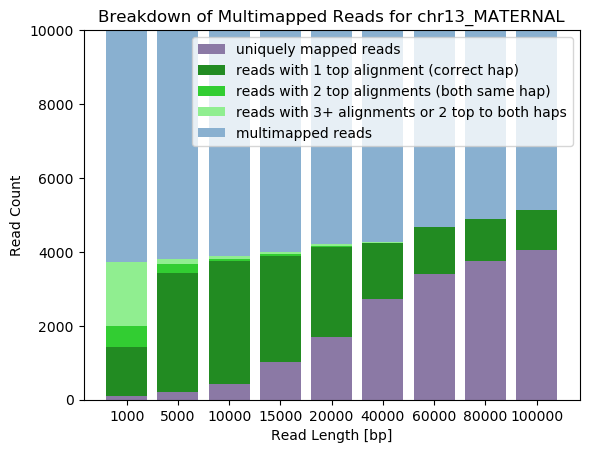

In [4]:
oneChrLst = [
            'chrX_MATERNAL', 
            'chrY_PATERNAL',
            'chr1_MATERNAL',
            # 'chr1_PATERNAL',
            'chr2_MATERNAL',
            'chr13_MATERNAL'
            ]

chrList = ["chr1_MATERNAL", "chr1_PATERNAL", "chr2_MATERNAL", "chr2_PATERNAL",
           "chr3_MATERNAL", "chr3_PATERNAL", "chr4_MATERNAL", "chr4_PATERNAL", 
           "chr5_MATERNAL", "chr5_PATERNAL", "chr6_MATERNAL", "chr6_PATERNAL", 
           "chr7_MATERNAL", "chr7_PATERNAL", "chr8_MATERNAL", "chr8_PATERNAL", 
           "chr9_MATERNAL", "chr9_PATERNAL", "chr10_MATERNAL", "chr10_PATERNAL", 
           "chr11_MATERNAL", "chr11_PATERNAL", "chr12_MATERNAL", "chr12_PATERNAL", 
           "chr13_MATERNAL", "chr13_PATERNAL", "chr14_MATERNAL", "chr14_PATERNAL", 
           "chr15_MATERNAL", "chr15_PATERNAL", "chr16_MATERNAL", "chr16_PATERNAL", 
           "chr17_MATERNAL", "chr17_PATERNAL", "chr18_MATERNAL", "chr18_PATERNAL", 
           "chr19_MATERNAL", "chr19_PATERNAL", "chr20_MATERNAL", "chr20_PATERNAL", 
           "chr21_MATERNAL", "chr21_PATERNAL", "chr22_MATERNAL", "chr22_PATERNAL",
           "chrX_MATERNAL", "chrY_PATERNAL"]

readLengths = [
            1000,
            5000,
            10000,
            15000,
            20000,
            40000,
            60000,
            80000,
            100000
            ]

for i in oneChrLst:
    print(f'running for {i}')
    multi_1,multi_2,multi_3 = [],[],[]
    uniqueList,multiMappedSame,multiMappedDiff,unmappedList,completeAlignmentList = [],[],[],[],[]
    for j in readLengths:
        print(f'    running for {j} bp')
        input_file = f"/Users/emilyxu/Desktop/readSimulationProject/aligned-10k-reads/{i}/{i}_sams/{j}-10kreads.sam"

        # Initialize an empty list to store SAM data
        sam_data = []

        # Read the SAM file line by line, excluding headers
        with open(input_file, 'r') as f:
            for line in f:
                if not line.startswith('@'):
                    sam_data.append(line.strip().split('\t'))

        df = pd.DataFrame(sam_data)

        # Count the occurrences of values in the first column (QNAME)
        value_counts = df[0].value_counts()

        # Extract values that appear more than once
        multi_mapped_values = value_counts[value_counts > 1].index.tolist()
        # Extract values that appear just once
        unique_mapped_values = value_counts[value_counts == 1].index.tolist()
        unmapped_reads = df[df[1] == '4']

        # Filter the DataFrame to get the multi-mapped entries
        multi_mapped_df = df[df[0].isin(multi_mapped_values)& (df[1] != '4')]
        unique_mapped_df = df[df[0].isin(unique_mapped_values)& (df[1] != '4')]

        uniquesCount = unique_mapped_df.shape[0]
        unmappedCount = unmapped_reads.shape[0]

        # is this necessary (yes it is)
        sameChrDF = multi_mapped_df[multi_mapped_df[2].str.startswith(i[:5])]
        # reads that map to a different chromosome
        diffChrDF = multi_mapped_df[~multi_mapped_df[2].str.startswith(i[:5])] 
        
        # exclude reads that are in the diffChr dataframe
        sameChrDF = sameChrDF[~sameChrDF[0].isin(diffChrDF[0])]
        # filtering for just the top multi aligned reads
        completeAlignment = sameChrDF[(sameChrDF[5] == f'{j}M') & ( sameChrDF[13] == f'AS:i:{2*j}') & (sameChrDF[11] == f'NM:i:0')]

        read_counts = completeAlignment[0].value_counts()

        # Get a list of reads that appear 3 times or less
        readsTopAligns = read_counts[read_counts <= 2].index
        reads3Aligns = read_counts[read_counts == 3].index
        reads2Aligns = read_counts[read_counts == 2].index
        reads1Aligns = read_counts[read_counts == 1].index

        # Use the isin function to filter the DataFrame for top alignments
        readsTopAlignsDF= completeAlignment[completeAlignment[0].isin(readsTopAligns)]
        reads3AlignDF = completeAlignment[completeAlignment[0].isin(reads3Aligns)]
        reads2AlignDF = completeAlignment[completeAlignment[0].isin(reads2Aligns)]
        reads1AlignDF = completeAlignment[completeAlignment[0].isin(reads1Aligns)]

        # filter for just top 2 alignments to same hap
        newDF = reads2AlignDF[reads2AlignDF[2]==i]
        newDFList = newDF[0].value_counts()
        reads2AlignsSameHap = newDFList[newDFList == 2].index
        reads2AlignsSameHapDF = reads2AlignDF[reads2AlignDF[0].isin(reads2AlignsSameHap)]
        reads2AlignsSameHapDF[0].nunique()

        # unique_mapped_df[3] = unique_mapped_df[3].astype(int)
        # filtered_df[3] = filtered_df[3].astype(int)

        # uniqueList = unique_mapped_df[3].values.tolist()
        # filteredList = filtered_df[3].values.tolist()
        multi_1.append(reads1AlignDF[reads1AlignDF[2]==i][0].nunique())
        # multi_2.append(len(reads2Aligns))
        multi_2.append(reads2AlignsSameHapDF[0].nunique())
        # uniqueList = unique_mapped_df[3].values.tolist()
        # filteredList = filtered_df[3].values.tolist()

        uniqueList.append(uniquesCount)
        # multiMappedSame.append(multi_mapped_df[0].nunique() - diffChrDF[0].nunique()-readsTopAlignsDF[0].nunique())
        multiMappedSame.append(multi_mapped_df[0].nunique() - diffChrDF[0].nunique()-reads1AlignDF[reads1AlignDF[2]==i][0].nunique()-reads2AlignsSameHapDF[0].nunique())
        multiMappedDiff.append(diffChrDF[0].nunique())
        unmappedList.append(unmappedCount)
        completeAlignmentList.append(readsTopAlignsDF[0].nunique())

    # plot bars in stack manner
    x = ["1000","5000","10000","15000","20000","40000","60000","80000","100000"]
    y1 = np.array(uniqueList) 
    # y2 = np.array(completeAlignmentList)
    y2 = np.array(multi_1) # reads with 1 top alignment (right hap)
    y3 = np.array(multi_2) # reads with 2 top alignments (both right hap)
    # y4 = np.array(multi_3)
    y4 = np.array(multiMappedSame) # everything else (3+)
    y5 = np.array(multiMappedDiff)
    y6 = np.array(unmappedList)

    dark= '#325b38'
    medium ='#008000'
    light ='#95BCA5'

    LightGreen= "#90EE90"
    LimeGreen="#32CD32"
    ForestGreen="#228B22"
    SeaGreen="#2E8B57"
    OliveGreen="#556B2F"

    grey = '#D3D3D3'
    Purple= '#8B79A5'
    Green ='#95BCA5'
    darkGreen ='#325b38'
    Blue ='#89B0D0'
    Pink='#FFB6C1'

    plt.bar(x, y1, color=Purple)
    plt.bar(x, y2, bottom=y1, color=ForestGreen)
    plt.bar(x, y3, bottom=y1+y2, color=LimeGreen)
    plt.bar(x, y4, bottom=y1+y2+y3, color=LightGreen)
    plt.bar(x, y5, bottom=y1+y2+y3+y4, color=Blue)
    plt.bar(x, y6, bottom=y1+y2+y3+y4+y5, color=Pink)
    # plt.bar(x, y7, bottom=y1+y2+y3+y4+y5+y6, color=grey)
    plt.xlabel("Read Length [bp]")
    plt.ylabel("Read Count")
    plt.legend(['uniquely mapped reads', 'reads with 1 top alignment (correct hap)', 'reads with 2 top alignments (both same hap)', 'reads with 3+ alignments or 2 top to both haps','multimapped reads'])
    plt.title(f"Breakdown of Multimapped Reads for {i}")
    plt.show()


running for chrX_MATERNAL


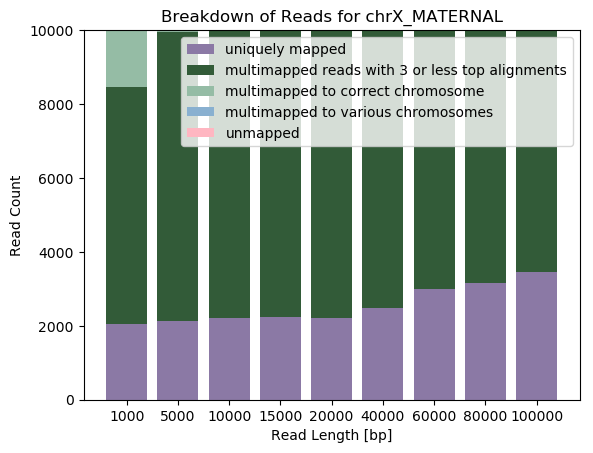

running for chrY_PATERNAL


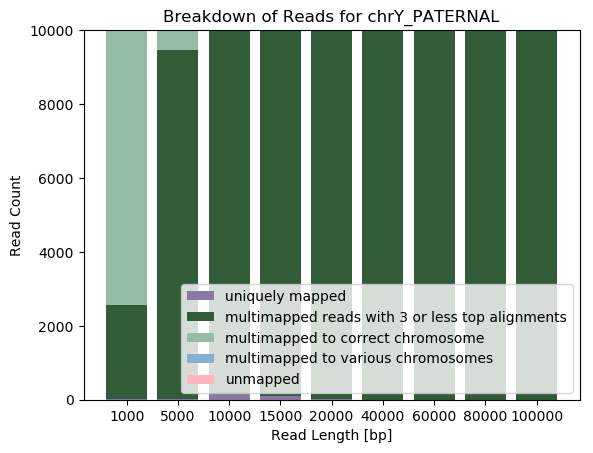

running for chr1_MATERNAL


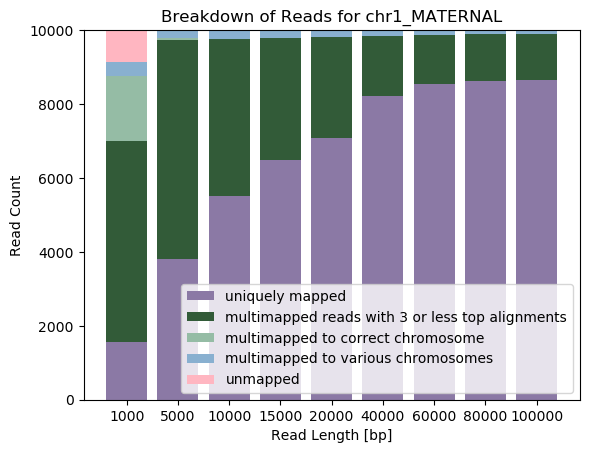

running for chr2_MATERNAL


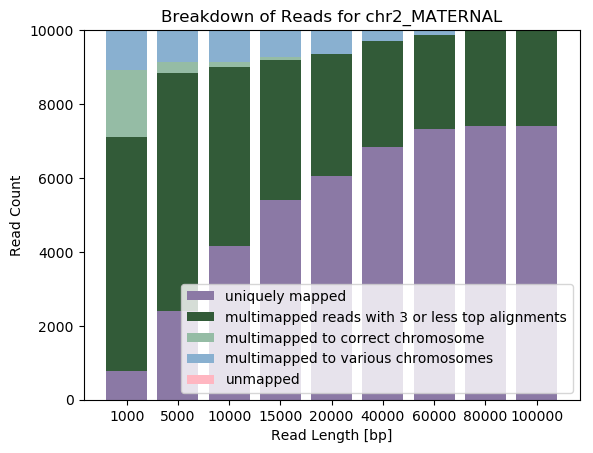

running for chr13_MATERNAL


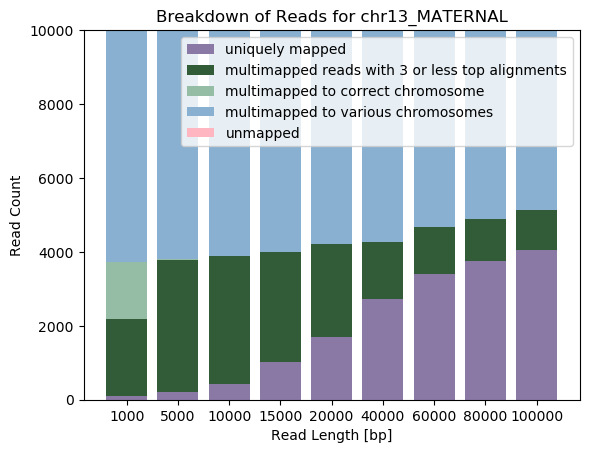

In [5]:
oneChrLst = [
            'chrX_MATERNAL', 
            'chrY_PATERNAL',
            'chr1_MATERNAL',
            # 'chr1_PATERNAL',
            'chr2_MATERNAL',
            'chr13_MATERNAL'
            ]
chrList = ["chr1_MATERNAL", "chr1_PATERNAL", "chr2_MATERNAL", "chr2_PATERNAL",
           "chr3_MATERNAL", "chr3_PATERNAL", "chr4_MATERNAL", "chr4_PATERNAL", 
           "chr5_MATERNAL", "chr5_PATERNAL", "chr6_MATERNAL", "chr6_PATERNAL", 
           "chr7_MATERNAL", "chr7_PATERNAL", "chr8_MATERNAL", "chr8_PATERNAL", 
           "chr9_MATERNAL", "chr9_PATERNAL", "chr10_MATERNAL", "chr10_PATERNAL", 
           "chr11_MATERNAL", "chr11_PATERNAL", "chr12_MATERNAL", "chr12_PATERNAL", 
           "chr13_MATERNAL", "chr13_PATERNAL", "chr14_MATERNAL", "chr14_PATERNAL", 
           "chr15_MATERNAL", "chr15_PATERNAL", "chr16_MATERNAL", "chr16_PATERNAL", 
           "chr17_MATERNAL", "chr17_PATERNAL", "chr18_MATERNAL", "chr18_PATERNAL", 
           "chr19_MATERNAL", "chr19_PATERNAL", "chr20_MATERNAL", "chr20_PATERNAL", 
           "chr21_MATERNAL", "chr21_PATERNAL", "chr22_MATERNAL", "chr22_PATERNAL",
           "chrX_MATERNAL", "chrY_PATERNAL"]
readLengths = [
            1000,
            5000,
            10000,
            15000,20000,
            40000,
            60000,
            80000,
            100000
            ]

for i in oneChrLst:
    print(f'running for {i}')
    multi_1,multi_2,multi_3 = [],[],[]
    uniqueList,multiMappedSame,multiMappedDiff,unmappedList,completeAlignmentList = [],[],[],[],[]
    for j in readLengths:
        # print(f'    running for {j} bp')
        input_file = f"/Users/emilyxu/Desktop/readSimulationProject/aligned-10k-reads/{i}/{i}_sams/{j}-10kreads.sam"

        # Initialize an empty list to store SAM data
        sam_data = []

        # Read the SAM file line by line, excluding headers
        with open(input_file, 'r') as f:
            for line in f:
                if not line.startswith('@'):
                    sam_data.append(line.strip().split('\t'))

        df = pd.DataFrame(sam_data)

        # Count the occurrences of values in the first column (QNAME)
        value_counts = df[0].value_counts()

        # Extract values that appear more than once
        multi_mapped_values = value_counts[value_counts > 1].index.tolist()
        # Extract values that appear just once
        unique_mapped_values = value_counts[value_counts == 1].index.tolist()
        unmapped_reads = df[df[1] == '4']

        # Filter the DataFrame to get the multi-mapped entries
        multi_mapped_df = df[df[0].isin(multi_mapped_values)& (df[1] != '4')]
        unique_mapped_df = df[df[0].isin(unique_mapped_values)& (df[1] != '4')]

        uniquesCount = unique_mapped_df.shape[0]
        unmappedCount = unmapped_reads.shape[0]

        # is this necessary (yes it is)
        sameChrDF = multi_mapped_df[multi_mapped_df[2].str.startswith(i[:5])]
        # reads that map to a different chromosome
        diffChrDF = multi_mapped_df[~multi_mapped_df[2].str.startswith(i[:5])] 
        
        # exclude reads that are in the diffChr dataframe
        sameChrDF = sameChrDF[~sameChrDF[0].isin(diffChrDF[0])]
        # filtering for just the top multi aligned reads
        completeAlignment = sameChrDF[(sameChrDF[5] == f'{j}M') & ( sameChrDF[13] == f'AS:i:{2*j}') & (sameChrDF[11] == f'NM:i:0')]

        read_counts = completeAlignment[0].value_counts()

        # Get a list of reads that appear 3 times or less
        readsTopAligns = read_counts[read_counts <= 2].index
        reads3Aligns = read_counts[read_counts == 3].index
        reads2Aligns = read_counts[read_counts == 2].index
        reads1Aligns = read_counts[read_counts == 1].index

        # Use the isin function to filter the DataFrame for top alignments
        readsTopAlignsDF= completeAlignment[completeAlignment[0].isin(readsTopAligns)]
        reads3AlignDF = completeAlignment[completeAlignment[0].isin(reads3Aligns)]
        reads2AlignDF = completeAlignment[completeAlignment[0].isin(reads2Aligns)]
        reads1AlignDF = completeAlignment[completeAlignment[0].isin(reads1Aligns)]

        # uniqueList = unique_mapped_df[3].values.tolist()
        # filteredList = filtered_df[3].values.tolist()
        multi_1.append(len(reads1Aligns))
        multi_2.append(len(reads2Aligns))
        multi_3.append(len(reads3Aligns))

        uniqueList.append(uniquesCount)
        multiMappedSame.append(multi_mapped_df[0].nunique() - diffChrDF[0].nunique()-readsTopAlignsDF[0].nunique())
        multiMappedDiff.append(diffChrDF[0].nunique())
        unmappedList.append(unmappedCount)
        completeAlignmentList.append(readsTopAlignsDF[0].nunique())

    # plot bars in stack manner
    x = ["1000","5000","10000","15000","20000","40000","60000","80000","100000"]
    y1 = np.array(uniqueList) 
    y2 = np.array(completeAlignmentList)
    y3 = np.array(multiMappedSame)
    y4 = np.array(multiMappedDiff)
    y5 = np.array(unmappedList)
    
    Purple= '#8B79A5'
    Green ='#95BCA5'
    darkGreen ='#325b38'
    Blue ='#89B0D0'
    Pink='#FFB6C1'

    plt.bar(x, y1, color=Purple)
    plt.bar(x, y2, bottom=y1, color=darkGreen)
    plt.bar(x, y3, bottom=y1+y2, color=Green)
    plt.bar(x, y4, bottom=y1+y2+y3, color=Blue)
    plt.bar(x, y5, bottom=y1+y2+y3+y4, color=Pink)
    plt.xlabel("Read Length [bp]")
    plt.ylabel("Read Count")
    plt.legend(['uniquely mapped', 'multimapped reads with 3 or less top alignments', 'multimapped to correct chromosome', 'multimapped to various chromosomes','unmapped'])
    plt.title(f"Breakdown of Reads for {i}")
    plt.show()